<a href="https://colab.research.google.com/github/DaniloRiver/Pythons17/blob/main/Modelo_de_Clasificacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Seminario de** **Investigación:** Regresión Logística



# Preliminares

In [2]:
#Librerias a Utilizar

#!pip install imbalanced-learn
#!pip install delayed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import precision_recall_curve,f1_score,auc
from sklearn.decomposition import PCA
from sklearn.model_selection import (cross_val_score,cross_val_predict,KFold)

from pylab import rcParams
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter


from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

from sklearn.metrics import precision_recall_curve,f1_score,auc
from sklearn.decomposition import PCA
from sklearn.model_selection import (cross_val_score,cross_val_predict,KFold)

import warnings
warnings.filterwarnings("ignore")



In [3]:
# scikit-learn version
import sys
import sklearn
print('sklearn: %s' % sklearn.__version__)
print(sys.version)


sklearn: 1.0.2
3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]


In [4]:
# Cargando el Dataset cancer
url="https://raw.githubusercontent.com/DaniloRiver/breast_cancer_data/master/data.csv"
pd.set_option('display.max_columns',None)
datos= pd.read_csv(url)
datos.tail(20)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
549,923465,B,10.820,24.21,68.89,361.6,0.08192,0.06602,0.015480,0.00816,0.1976,0.06328,0.5196,1.918,3.564,33.00,0.008263,0.018700,0.012770,0.005917,0.02466,0.002977,13.030,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.00000,0.1661,0.05948,0.3163,1.304,2.115,20.67,0.009579,0.011040,0.000000,0.000000,0.03004,0.002228,11.660,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592
551,923780,B,11.130,22.44,71.49,378.4,0.09566,0.08194,0.048240,0.02257,0.2030,0.06552,0.2800,1.467,1.994,17.85,0.003495,0.030510,0.034450,0.010240,0.02912,0.004723,12.020,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032
552,924084,B,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.01499,0.1539,0.05637,0.2409,1.367,1.477,18.76,0.008835,0.012330,0.013280,0.009305,0.01897,0.001726,13.870,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484
553,924342,B,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,0.3013,1.879,2.121,17.86,0.010940,0.018340,0.039960,0.012820,0.03759,0.004623,9.845,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393
554,924632,B,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,0.1566,0.05708,0.2116,1.360,1.502,16.83,0.008412,0.021530,0.038980,0.007620,0.01695,0.002801,13.890,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242
555,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,0.2199,2.239,1.437,14.46,0.012050,0.027360,0.048040,0.017210,0.01843,0.004938,10.840,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283
556,924964,B,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,0.2441,2.090,1.648,16.80,0.012910,0.022220,0.004174,0.007082,0.02572,0.002278,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,0.5375,2.927,3.618,29.11,0.011590,0.011240,0.000000,0.000000,0.03004,0.003324,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
558,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,0.1454,0.06147,0.2254,1.108,2.224,19.54,0.004242,0.046390,0.065780,0.016060,0.01638,0.004406,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004


# Análisis Exploratorio

In [5]:
#Estadisticos para el Dataset
datos.describe()
Cancer= datos

In [6]:
# Utilizando los primeros 200 registros de Diabetes.csv (Dimensiones)
#Diabetes=datos[:200]
Cancer.shape

(569, 32)

In [7]:
Cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
#verificando los valores nulos
Cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
#borrando id del dataset
Cancer= Cancer.drop(['id'],axis=1)

In [11]:
Cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


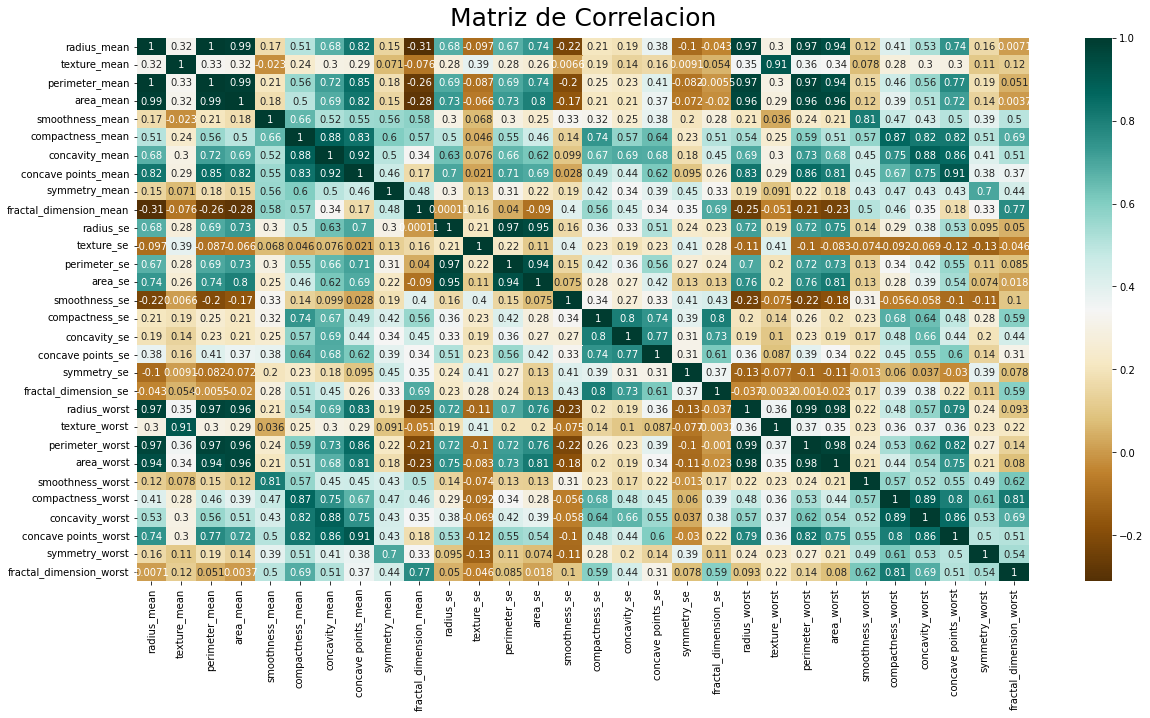

In [12]:
#Matriz de correlacion de pearson
plt.figure(figsize=(20,10))
heatmap= sns.heatmap(Cancer.corr(),cmap='BrBG',annot=True)
heatmap.set_title('Matriz de Correlacion',fontdict={'fontsize':25},pad=12);

In [13]:
# Utilizando los registros de Cancer.csv (Dimensiones)
Cancer=datos
print(Cancer.shape)
print(pd.value_counts(Cancer['diagnosis'], sort = True))

(569, 32)
B    357
M    212
Name: diagnosis, dtype: int64


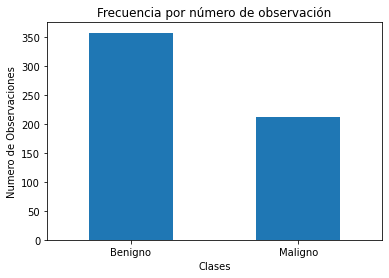

In [14]:
#Recuento de Clases
conteo_clases = pd.value_counts(Cancer['diagnosis'], sort = True)
conteo_clases.plot(kind = 'bar', rot=0)
plt.title("Frecuencia por número de observación")
plt.xlabel("Clases")
plt.ylabel("Numero de Observaciones")
plt.xticks(range(2),['Benigno','Maligno'])
plt.savefig('explorar.eps',format='eps',dpi=1200,transparent=True)

# Determinación de los Parametros Optimos para el Modelo

In [27]:
#Funcion que Calcula la metrica AUC para cada parametro dentro del dataset
def calcular_auc(variables, target, tabla_base):
    X=tabla_base[variables]
    y=tabla_base[target]
    logreg = LogisticRegression()
    logreg.fit(X, y)
    predictor = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(y, predictor)
    return(auc)


In [28]:
#Funcion que determina la mejor combinacion y cantidad de parametros a utilizar mediante Forward stepwise 
def next_best(variables_actuales,variables_candidatos, target, tabla_base):
    best_auc = -1
    best_variable = None
    for v in variables_candidatos:
        auc_v = calcular_auc(variables_actuales + [v], target, tabla_base)
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
    return best_variable


In [29]:
#Se utilizaran 6 de las 8 variables dentro del dataset con mejor AUC entre ellas
variables_candidatos = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
variables_actuales = []
target = "diagnosis"
maximo_numero_variables = 6
numero_iteraciones = min(maximo_numero_variables, len(variables_candidatos))
for i in range(0,numero_iteraciones):
    next_var = next_best(variables_actuales,variables_candidatos,target,Cancer)
    variables_actuales = variables_actuales + [next_var]
    variables_candidatos.remove(next_var)
print(variables_actuales)

['perimeter_worst', 'texture_worst', 'concavity_worst', 'area_se', 'radius_mean', 'perimeter_se']


In [30]:
#Interpretacion de cada variable y su probabilidad AUC respectiva
auc_valor = []
variables_evaluadas = []
for v in variables_actuales:
    variables_evaluadas.append(v)
    auc_valores = calcular_auc(variables_evaluadas, "diagnosis", Cancer)
    auc_valor.append(auc_valores)

for p,c in zip(variables_evaluadas,list(auc_valor)):
    print(p + '\t\t' + str(round(c,2)))



perimeter_worst		0.98
texture_worst		0.99
concavity_worst		0.99
area_se		0.99
radius_mean		0.99
perimeter_se		0.99


In [31]:
#CONVIRTIENDO LA VARIABLE CATEGORICA
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
Cancer['diagnosis']= le.fit_transform(Cancer['diagnosis'])
Cancer['diagnosis'].tail()

564    1
565    1
566    1
567    1
568    0
Name: diagnosis, dtype: int64

# División y Entrenamiento de los Datos

In [32]:
# Preparando las variables X, y del modelo  X=Matriz de Predictores , y= variable de resultados  1: con diabetes , 0: sin diabetes
X=Cancer[variables_evaluadas]
y=Cancer['diagnosis']

In [33]:
# implementacion de algoritmo de entrenamiento conjunto de prueba del 25% sobre el total del dataset, algoritmo de optimizacion:
# El "lbfgs" es un algoritmo de optimización que se aproxima al algoritmo de Broyden-Fletcher-Goldfarb-Shanno ,que pertenece a los métodos cuasi-Newton. 
#"lbfgs" se utiliza por defecto por su robustez.

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.25,random_state=0)

In [34]:
#  StandardScaler() normalizará las características (cada columna de X, INDIVIDUALMENTE !!!) 
#  para que cada columna/característica/variable tenga mean = 0 y standard deviation = 1.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


#Modelo con Parametros Modificados

In [35]:
# Aplicacion del algoritmo de regresion logistica y entrenamiento de las variables X_train,y_train

logreg =LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [36]:
# coeficiente que corresponde a los coeficientes B (beta) que corresponden a los de la ecuacion de regresion logistica (pesos)
logreg.coef_


array([[2.90284202, 1.22121361, 1.41763241, 1.47325543, 0.76923472,
        0.64610341]])

In [37]:
#prediciendo los datos de prueba en base al modelo creado 
y_pred=logreg.predict(X_test)
#Matriz de confusion 
Matriz_confusion= confusion_matrix(y_test,y_pred)
print(Matriz_confusion)
print(classification_report(y_test,y_pred))

[[84  6]
 [ 1 52]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        90
           1       0.90      0.98      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



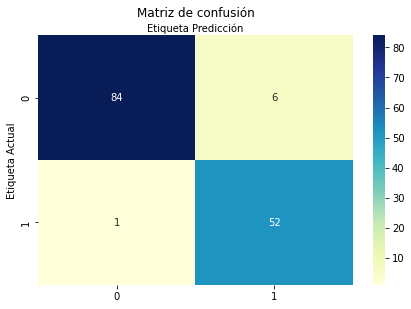

In [38]:
#Mapa de calor de la Matriz de confusion
def confusion(Matriz_confusion):
    nombre_clase=[0,1]
    fig,ax= plt.subplots()
    tick_marks=np.arange(len(nombre_clase))
    plt.xticks(tick_marks,nombre_clase)
    plt.yticks(tick_marks,nombre_clase)

    sns.heatmap(pd.DataFrame(Matriz_confusion),annot=True,cmap='YlGnBu',fmt='g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title("Matriz de confusión",y=1.1)
    plt.ylabel('Etiqueta Actual')
    plt.xlabel('Etiqueta Predicción')
    #plt.savefig('confusion1.eps',format='eps',dpi=1200)
confusion(Matriz_confusion)

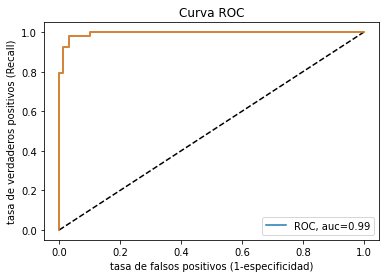

In [39]:
#Lo que estamos viendo es exactamente la curva ROC del clasificador. Y nos da bastante información: en primer lugar nos dice que aumentando o disminuyendo lo suficiente 
#el threshold podemos conseguir que nuestro algoritmo de clasificación alcance un TPR o un FPR casi perfecto.
#Cuando AUC es 0.7, significa que hay 70% de probabilidad de que el modelo pueda distinguir entre clase positiva y clase negativa. Esta es la peor situación.
#Cuando el AUC es aproximadamente 0.5, el modelo no tiene capacidad de discriminación para distinguir entre clase positiva y clase negativa.

y_pred_prob= logreg.predict_proba(X_test)[:,1]
fpr_1, tpr_1,tresholds1= roc_curve(y_test,y_pred_prob)
auc_score_1 = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr_1,tpr_1,label="ROC, auc="+str(round(auc_score_1,2)))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.title("Curva ROC")
plt.plot(fpr_1,tpr_1,label='Regresión Logistica')
plt.xlabel('tasa de falsos positivos (1-especificidad)')
plt.ylabel('tasa de verdaderos positivos (Recall)')
#plt.savefig('roc1.eps',format='eps', dpi=1200,transparent=True)
plt.show()

Regresión Logística: f1=0.937 auc=0.991


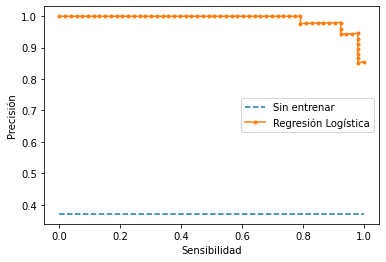

In [40]:
from matplotlib import pyplot
# predecimos probabilidades
y_pred_prob= logreg.predict_proba(X_test)[:,1]
# Sacamos los valores
yhat = logreg.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_prob)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos 
print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# trazar las curvas de recuperación de precisión
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
plt.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
#Etiquetas de ejes
plt.xlabel('Sensibilidad')
plt.ylabel('Precisión')
#plt.savefig('recall.eps',format='eps', dpi=1200,transparent=True)
plt.legend()
plt.show()




# Estrategias Para Validación y Remuestreo de los Datos (Disminuir el desbalanceo)

**Estrategia: Penalización para compensar**

In [41]:
# Aplicacion del algoritmo de regresion logistica y entrenamiento de las variables X_train,y_train

logreg_1 =LogisticRegression(class_weight='balanced')
logreg_1.fit(X_train,y_train)
y_pred_0=logreg_1.predict(X_test)
y_pred_prob_1= logreg_1.predict_proba(X_test)[:,1]
fpr_2, tpr_2,tresholds2= roc_curve(y_test,y_pred_prob_1)
auc_score_2 = roc_auc_score(y_test, y_pred_prob_1)

#Matriz de confusion 
Matriz_confusion_0= confusion_matrix(y_test,y_pred_0)
print(Matriz_confusion_0)
print(classification_report(y_test,y_pred_0))

[[81  9]
 [ 1 52]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        90
           1       0.85      0.98      0.91        53

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143



**Estrategia: Subsampling en la clase mayoritaria**

In [42]:
us = NearMiss(n_neighbors=3, version=2)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)
 
print("Distribución antes del remuestreo {}".format(Counter(y_train)))
print("Distribución después del remuestreo{}".format(Counter(y_train_res)))

modelo1=LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
modelo1.fit(X_train_res, y_train_res)
y_pred_1 = modelo1.predict(X_test)
y_pred_prob_2= modelo1.predict_proba(X_test)[:,1]
fpr_3, tpr_3,tresholds3= roc_curve(y_test,y_pred_prob_2)
auc_score_3 = roc_auc_score(y_test, y_pred_prob_2)

#Matriz de confusion
Matriz_confusion_1= confusion_matrix(y_test,y_pred_1)
print(Matriz_confusion_1)
print(classification_report(y_test,y_pred_1))


Distribución antes del remuestreo Counter({0: 267, 1: 159})
Distribución después del remuestreoCounter({0: 159, 1: 159})
[[84  6]
 [ 1 52]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        90
           1       0.90      0.98      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



**Estrategia: Metodo UnderSampling**

In [43]:
os = RandomUnderSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

print("Distribution before resampling {}".format(Counter(y_train)))
print("Distribution labels after resampling {}".format(Counter(y_train_res)))
modelo2=LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
modelo2.fit(X_train_res, y_train_res)
y_pred_3 = modelo2.predict(X_test)
y_pred_prob_4= modelo2.predict_proba(X_test)[:,1]
fpr_5, tpr_5,tresholds5= roc_curve(y_test,y_pred_prob_4)
auc_score_5 = roc_auc_score(y_test, y_pred_prob_4)
Matriz_confusion_3= confusion_matrix(y_test,y_pred_3)
print(Matriz_confusion_3)
print(classification_report(y_test,y_pred_3))


Distribution before resampling Counter({0: 267, 1: 159})
Distribution labels after resampling Counter({0: 159, 1: 159})
[[82  8]
 [ 1 52]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        90
           1       0.87      0.98      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.93       143
weighted avg       0.94      0.94      0.94       143



**Estrategia: Oversampling de la clase minoritaria**

In [44]:
os = RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

modelo3=LogisticRegression(C=1.0,penalty='l2',random_state=0)
modelo3.fit(X_train_res, y_train_res)
y_pred_4 = modelo3.predict(X_test)
y_pred_prob_5= modelo3.predict_proba(X_test)[:,1]
fpr_6, tpr_6,tresholds6= roc_curve(y_test,y_pred_prob_5)
auc_score_6 = roc_auc_score(y_test, y_pred_prob_5)
Matriz_confusion_4= confusion_matrix(y_test,y_pred_4)
print(Matriz_confusion_4)
print(classification_report(y_test,y_pred_4))

Distribution before resampling Counter({0: 267, 1: 159})
Distribution labels after resampling Counter({0: 267, 1: 267})
[[81  9]
 [ 0 53]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        90
           1       0.85      1.00      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.93       143
weighted avg       0.95      0.94      0.94       143



**Estrategia: implementar K-Folds**

In [45]:
kf=KFold(n_splits=10,shuffle=True,random_state=42)
#for train,test in kf.split(Diabetes):
 # print(train)
  #print(test)


In [46]:
#modelox=LogisticRegression()
#modelox.fit(X,y)
y_pred_6= cross_val_predict(logreg,X,y,cv=kf,n_jobs=-1)
y_pred_prob_7= logreg.predict_proba(X_test)[:,1]
fpr_8, tpr_8,tresholds8= roc_curve(y_test,y_pred_prob_7)
auc_score_8 = roc_auc_score(y_test, y_pred_prob_7)
Matriz_confusion_6= confusion_matrix(y,y_pred_6)
print(Matriz_confusion_6)
print(classification_report(y,y_pred_6))

[[347  10]
 [ 16 196]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       357
           1       0.95      0.92      0.94       212

    accuracy                           0.95       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.95      0.95      0.95       569



#Representando las Estrategias en la Curva ROC

In [47]:
Estrategia =['Modelo -Parametros Modificados-','Penalización para compensar','Subsampling clase mayoritaria','Ensamble de Modelos con Balanceo','UnderSampling aleatorio',' Oversampling clase minoritaria',' implementar K-Folds']


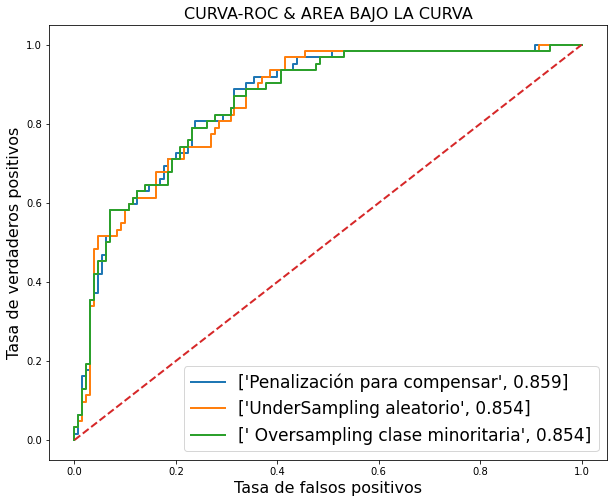

In [ ]:
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
    
#ax.plot(fpr_1,tpr_1,label = [Estrategia[0], "AUC ROC :", round(auc_score_1,3)],linewidth=2,linestyle="solid")
ax.plot(fpr_2,tpr_2,label = [Estrategia[1], round(auc_score_2,3)],linewidth=2,linestyle="solid")
#ax.plot(fpr_3,tpr_3,label = [Estrategia[2], round(auc_score_3,3)],linewidth=2,linestyle="dotted")
#ax.plot(fpr_4,tpr_4,label = [Estrategia[3], round(auc_score_4,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_5,tpr_5,label = [Estrategia[4], round(auc_score_5,3)],linewidth=2,linestyle="solid")
ax.plot(fpr_6,tpr_6,label = [Estrategia[5], round(auc_score_6,3)],linewidth=2,linestyle="solid")
#ax.plot(fpr_8,tpr_8,label = [Estrategia[6], round(auc_score_8,3)],linewidth=2,linestyle="dotted")

ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
plt.legend(loc="Mejor",prop={'size':17})
plt.title("CURVA-ROC & AREA BAJO LA CURVA",fontsize=16)
plt.xlabel("Tasa de falsos positivos",fontsize=16)
plt.ylabel("Tasa de verdaderos positivos",fontsize=16)
#plt.savefig('roc_auc.eps',format='eps',dpi=1000,transparent=False)
plt.show()



# Curva Recall-Precision

Estrategia Penalización por Compensación


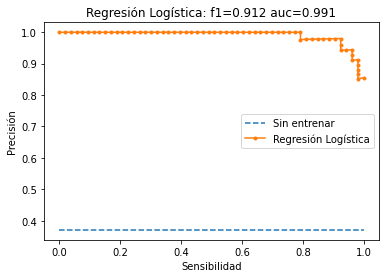


Estrategia Oversampling en la clase minoritaria


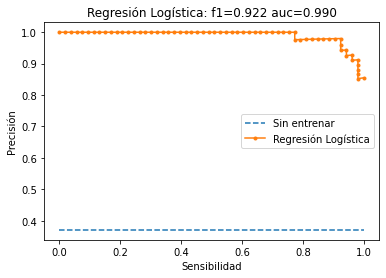


Estrategia solo Parametros Modificados


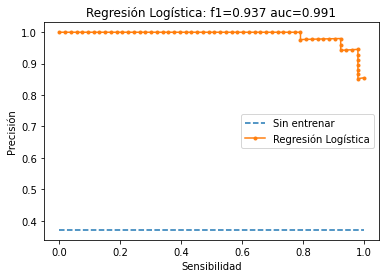


Estrategia: Undersampling Aleatorio


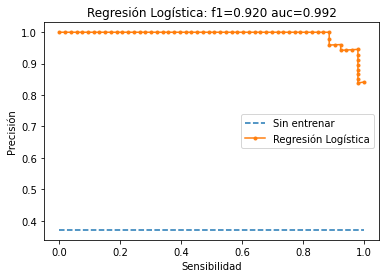

In [48]:
def Grafica_Recall_Precision(modelo,X_test,y_pred_prob,y_test):
    # Sacamos los valores
    yhat = modelo.predict(X_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_prob)
    lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
    # Resumimos 
    # trazar las curvas de recuperación de precisión
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
    plt.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
    #Etiquetas de ejes
    plt.xlabel('Sensibilidad')
    plt.ylabel('Precisión')
    plt.title('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    plt.legend()
    #plt.savefig('recall1.eps',format='eps')
    plt.show()


print('Estrategia Penalización por Compensación')
Grafica_Recall_Precision(logreg_1,X_test,y_pred_prob_1,y_test)

print('\nEstrategia Oversampling en la clase minoritaria')
Grafica_Recall_Precision(modelo3,X_test,y_pred_prob_5,y_test)

print('\nEstrategia solo Parametros Modificados')
Grafica_Recall_Precision(logreg,X_test,y_pred_prob,y_test)

print('\nEstrategia: Undersampling Aleatorio')
Grafica_Recall_Precision(modelo2,X_test,y_pred_prob_4,y_test)

#Nuevas Estrategias de Remuestreo

In [49]:
def plot_2d_space(X, y, label='Outcome'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

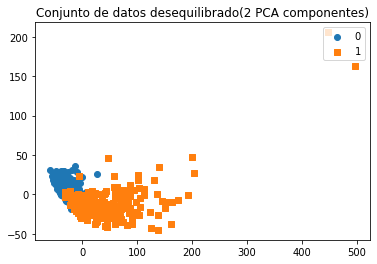

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plot_2d_space(X_pca, y, 'Conjunto de datos desequilibrado(2 PCA componentes)')

**Under-sampling: Cluster Centroids**
Esta técnica realiza un submuestreo mediante la generación de centroides basados en métodos de agrupación. Los datos se agruparán previamente por similitud, con el fin de preservar la información.

In [51]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)

In [52]:
# implementacion de algoritmo de entrenamiento conjunto de prueba del 25% sobre el total del dataset, algoritmo de optimizacion:
# El "lbfgs" es un algoritmo de optimización que se aproxima al algoritmo de Broyden-Fletcher-Goldfarb-Shanno ,que pertenece a los métodos cuasi-Newton. 
#"lbfgs" se utiliza por defecto por su robustez.

X_train,X_test,y_train,y_test= train_test_split(X_cc,y_cc,test_size= 0.20,random_state=1)

In [53]:
logreg_cc =LogisticRegression()
logreg_cc.fit(X_train,y_train)
y_pred= logreg_cc.predict(X_test)

In [54]:
#prediciendo los datos de prueba en base al modelo creado 
y_pred=logreg_cc.predict(X_test)
#Matriz de confusion 
Matriz_confusion= confusion_matrix(y_test,y_pred)
print(Matriz_confusion)
print(classification_report(y_test,y_pred))

[[37  0]
 [ 3 45]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       1.00      0.94      0.97        48

    accuracy                           0.96        85
   macro avg       0.96      0.97      0.96        85
weighted avg       0.97      0.96      0.96        85



**ADASYN**

In [55]:
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN(random_state=123).fit_resample(X, y)


In [56]:
# implementacion de algoritmo de entrenamiento conjunto de prueba del 25% sobre el total del dataset, algoritmo de optimizacion:
# El "lbfgs" es un algoritmo de optimización que se aproxima al algoritmo de Broyden-Fletcher-Goldfarb-Shanno ,que pertenece a los métodos cuasi-Newton. 
#"lbfgs" se utiliza por defecto por su robustez.

X_train,X_test,y_train,y_test= train_test_split(X_resampled,y_resampled,test_size= 0.20,random_state=1)

In [57]:
logreg_ADA =LogisticRegression()
logreg_ADA.fit(X_train,y_train)
y_pred= logreg_ADA.predict(X_test)

In [58]:
#prediciendo los datos de prueba en base al modelo creado 
y_pred=logreg_ADA.predict(X_test)
#Matriz de confusion 
Matriz_confusion= confusion_matrix(y_test,y_pred)
print(Matriz_confusion)
print(classification_report(y_test,y_pred))

[[64  2]
 [ 5 72]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        66
           1       0.97      0.94      0.95        77

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



**SMOTE**


In [59]:
from imblearn.over_sampling import SMOTE, ADASYN

X_resampled_1, y_resampled_1 = SMOTE(random_state=123).fit_resample(X, y)

In [60]:
# implementacion de algoritmo de entrenamiento conjunto de prueba del 25% sobre el total del dataset, algoritmo de optimizacion:
# El "lbfgs" es un algoritmo de optimización que se aproxima al algoritmo de Broyden-Fletcher-Goldfarb-Shanno ,que pertenece a los métodos cuasi-Newton. 
#"lbfgs" se utiliza por defecto por su robustez.

X_train,X_test,y_train,y_test= train_test_split(X_resampled_1,y_resampled_1,test_size= 0.20,random_state=1)

In [61]:
logreg_SMOTE =LogisticRegression()
logreg_SMOTE.fit(X_train,y_train)
y_pred= logreg_SMOTE.predict(X_test)

In [62]:
#prediciendo los datos de prueba en base al modelo creado 
y_pred=logreg_SMOTE.predict(X_test)
#Matriz de confusion 
Matriz_confusion= confusion_matrix(y_test,y_pred)
print(Matriz_confusion)
print(classification_report(y_test,y_pred))

[[64  2]
 [ 4 73]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        66
           1       0.97      0.95      0.96        77

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



#Over-sampling seguido por under-sampling Regresion Logistica
Se usa una combinación de sobremuestreo y submuestreo, utilizando las técnicas de enlaces SMOTE y Tomek:

In [63]:
from imblearn.combine import SMOTEENN

X_resampled, y_resampled = SMOTEENN(random_state=123).fit_resample(X, y)

In [64]:
# implementacion de algoritmo de entrenamiento conjunto de prueba del 25% sobre el total del dataset, algoritmo de optimizacion:
# El "lbfgs" es un algoritmo de optimización que se aproxima al algoritmo de Broyden-Fletcher-Goldfarb-Shanno ,que pertenece a los métodos cuasi-Newton. 
#"lbfgs" se utiliza por defecto por su robustez.

X_train,X_test,y_train,y_test= train_test_split(X_resampled,y_resampled,test_size= 0.20,random_state=1)

In [65]:
logreg_smt =LogisticRegression()
logreg_smt.fit(X_train,y_train)
y_pred= logreg_smt.predict(X_test)

In [66]:
#prediciendo los datos de prueba en base al modelo creado 
y_pred=logreg_smt.predict(X_test)
#Matriz de confusion 
Matriz_confusion= confusion_matrix(y_test,y_pred)
print(Matriz_confusion)
print(classification_report(y_test,y_pred))

[[59  0]
 [ 0 64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        64

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



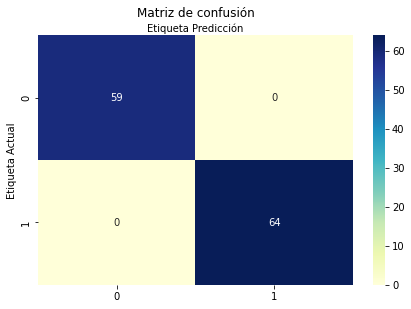

In [67]:
#Mapa de calor de la Matriz de confusion
def confusion(Matriz_confusion):
    nombre_clase=[0,1]
    fig,ax= plt.subplots()
    tick_marks=np.arange(len(nombre_clase))
    plt.xticks(tick_marks,nombre_clase)
    plt.yticks(tick_marks,nombre_clase)

    sns.heatmap(pd.DataFrame(Matriz_confusion),annot=True,cmap='YlGnBu',fmt='g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title("Matriz de confusión",y=1.1)
    plt.ylabel('Etiqueta Actual')
    plt.xlabel('Etiqueta Predicción')
    #plt.savefig('confusion1.eps',format='eps',dpi=1200)
confusion(Matriz_confusion)

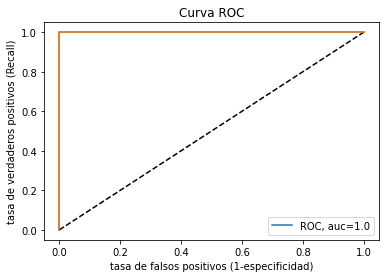

In [68]:
#Lo que estamos viendo es exactamente la curva ROC del clasificador. Y nos da bastante información: en primer lugar nos dice que aumentando o disminuyendo lo suficiente 
#el threshold podemos conseguir que nuestro algoritmo de clasificación alcance un TPR o un FPR casi perfecto.
#Cuando AUC es 0.7, significa que hay 70% de probabilidad de que el modelo pueda distinguir entre clase positiva y clase negativa. Esta es la peor situación.
#Cuando el AUC es aproximadamente 0.5, el modelo no tiene capacidad de discriminación para distinguir entre clase positiva y clase negativa.

y_pred_prob= logreg_smt.predict_proba(X_test)[:,1]
fpr_11, tpr_11,tresholds11= roc_curve(y_test,y_pred_prob)
auc_score_11 = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr_11,tpr_11,label="ROC, auc="+str(round(auc_score_11,2)))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.title("Curva ROC")
plt.plot(fpr_11,tpr_11,label='Regresión Logistica')
plt.xlabel('tasa de falsos positivos (1-especificidad)')
plt.ylabel('tasa de verdaderos positivos (Recall)')
#plt.savefig('roc1.eps',format='eps', dpi=1200,transparent=True)
plt.show()

Regresión Logística: f1=1.000 auc=1.000


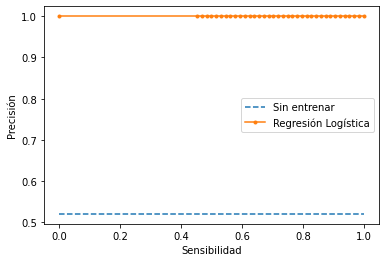

In [69]:
from matplotlib import pyplot
# predecimos probabilidades
y_pred_prob= logreg_smt.predict_proba(X_test)[:,1]
# Sacamos los valores
yhat = logreg_smt.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_prob)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos 
print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# trazar las curvas de recuperación de precisión
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
plt.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
#Etiquetas de ejes
plt.xlabel('Sensibilidad')
plt.ylabel('Precisión')
#plt.savefig('recall.eps',format='eps', dpi=1200,transparent=True)
plt.legend()
plt.show()




#Arbol de Decision

**Sin Modificacion de Datos**

In [70]:
# implementacion de algoritmo de entrenamiento conjunto de prueba del 25% sobre el total del dataset, algoritmo de optimizacion:
# El "lbfgs" es un algoritmo de optimización que se aproxima al algoritmo de Broyden-Fletcher-Goldfarb-Shanno ,que pertenece a los métodos cuasi-Newton. 
#"lbfgs" se utiliza por defecto por su robustez.

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.20,random_state=1)

In [71]:
Arbol=DecisionTreeClassifier(max_depth=5,random_state=1)
Arbol.fit(X_train,y_train)
y_pred= Arbol.predict(X_test)

In [72]:
#prediciendo los datos de prueba en base al modelo creado 
y_pred=Arbol.predict(X_test)
#Matriz de confusion 
Matriz_confusion0= confusion_matrix(y_test,y_pred)
print(Matriz_confusion0)
print(classification_report(y_test,y_pred))

[[68  4]
 [ 7 35]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        72
           1       0.90      0.83      0.86        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



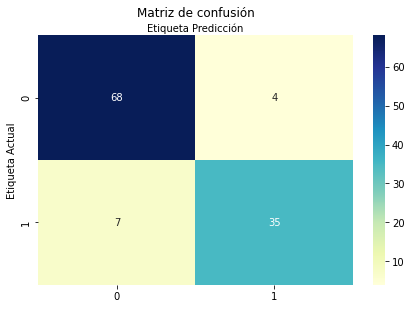

In [74]:
#Mapa de calor de la Matriz de confusion
def confusion(Matriz_confusion):
    nombre_clase=[0,1]
    fig,ax= plt.subplots()
    tick_marks=np.arange(len(nombre_clase))
    plt.xticks(tick_marks,nombre_clase)
    plt.yticks(tick_marks,nombre_clase)

    sns.heatmap(pd.DataFrame(Matriz_confusion),annot=True,cmap='YlGnBu',fmt='g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title("Matriz de confusión",y=1.1)
    plt.ylabel('Etiqueta Actual')
    plt.xlabel('Etiqueta Predicción')
    #plt.savefig('confusion1.eps',format='eps',dpi=1200)
confusion(Matriz_confusion0)


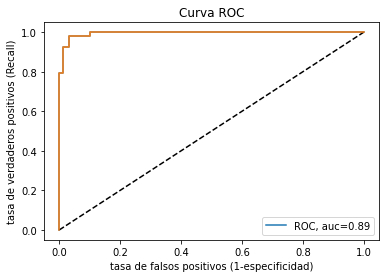

In [75]:
#Lo que estamos viendo es exactamente la curva ROC del clasificador. Y nos da bastante información: en primer lugar nos dice que aumentando o disminuyendo lo suficiente 
#el threshold podemos conseguir que nuestro algoritmo de clasificación alcance un TPR o un FPR casi perfecto.
#Cuando AUC es 0.7, significa que hay 70% de probabilidad de que el modelo pueda distinguir entre clase positiva y clase negativa. Esta es la peor situación.
#Cuando el AUC es aproximadamente 0.5, el modelo no tiene capacidad de discriminación para distinguir entre clase positiva y clase negativa.


y_pred_prob= Arbol.predict_proba(X_test)[:,1]
fpr_99, tpr_99,tresholds1= roc_curve(y_test,y_pred_prob)
auc_score_99 = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr_1,tpr_1,label="ROC, auc="+str(round(auc_score_99,2)))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.title("Curva ROC")
plt.plot(fpr_1,tpr_1,label='Regresión Logistica')
plt.xlabel('tasa de falsos positivos (1-especificidad)')
plt.ylabel('tasa de verdaderos positivos (Recall)')
#plt.savefig('roc1.eps',format='eps', dpi=1200,transparent=True)
plt.show()




#Over-sampling seguido por under-sampling (Arbol de Decision)



In [76]:
from imblearn.combine import SMOTEENN

X_resampled1, y_resampled1 = SMOTEENN(random_state=123).fit_resample(X, y)


In [77]:
# implementacion de algoritmo de entrenamiento conjunto de prueba del 25% sobre el total del dataset, algoritmo de optimizacion:
# El "lbfgs" es un algoritmo de optimización que se aproxima al algoritmo de Broyden-Fletcher-Goldfarb-Shanno ,que pertenece a los métodos cuasi-Newton. 
#"lbfgs" se utiliza por defecto por su robustez.

X_train,X_test,y_train,y_test= train_test_split(X_resampled1,y_resampled1,test_size= 0.20,random_state=1)

In [78]:
Arbol2=DecisionTreeClassifier(max_depth=5,random_state=1)
Arbol2.fit(X_train,y_train)
y_pred= Arbol2.predict(X_test)

In [79]:
#prediciendo los datos de prueba en base al modelo creado 
y_pred=Arbol2.predict(X_test)
#Matriz de confusion 
Matriz_confusion= confusion_matrix(y_test,y_pred)
print(Matriz_confusion)
print(classification_report(y_test,y_pred))

[[59  0]
 [ 1 63]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       1.00      0.98      0.99        64

    accuracy                           0.99       123
   macro avg       0.99      0.99      0.99       123
weighted avg       0.99      0.99      0.99       123



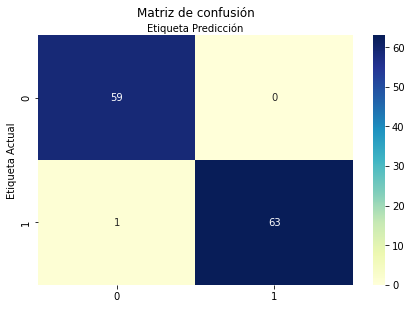

In [80]:
#Mapa de calor de la Matriz de confusion
def confusion(Matriz_confusion):
    nombre_clase=[0,1]
    fig,ax= plt.subplots()
    tick_marks=np.arange(len(nombre_clase))
    plt.xticks(tick_marks,nombre_clase)
    plt.yticks(tick_marks,nombre_clase)

    sns.heatmap(pd.DataFrame(Matriz_confusion),annot=True,cmap='YlGnBu',fmt='g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title("Matriz de confusión",y=1.1)
    plt.ylabel('Etiqueta Actual')
    plt.xlabel('Etiqueta Predicción')
    #plt.savefig('confusion1.eps',format='eps',dpi=1200)
confusion(Matriz_confusion)

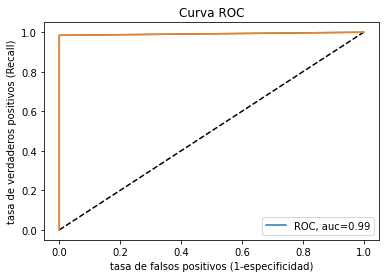

In [81]:
y_pred_prob3= Arbol2.predict_proba(X_test)[:,1]
fpr_44, tpr_44,tresholds44= roc_curve(y_test,y_pred_prob3)
auc_score_44 = roc_auc_score(y_test, y_pred_prob3)
plt.plot(fpr_44,tpr_44,label="ROC, auc="+str(round(auc_score_44,2)))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.title("Curva ROC")
plt.plot(fpr_44,tpr_44,label='Regresión Logistica')
plt.xlabel('tasa de falsos positivos (1-especificidad)')
plt.ylabel('tasa de verdaderos positivos (Recall)')
#plt.savefig('roc1.eps',format='eps', dpi=1200,transparent=True)
plt.show()

Regresión Logística: f1=0.992 auc=0.996


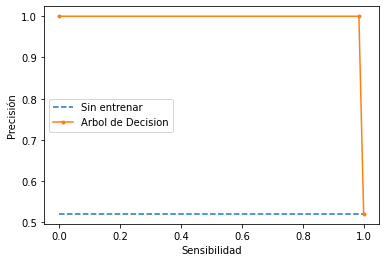

In [82]:
# predecimos probabilidades
y_pred_prob= Arbol2.predict_proba(X_test)[:,1]
# Sacamos los valores
yhat = Arbol2.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_prob)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos 
print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# trazar las curvas de recuperación de precisión
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
plt.plot(lr_recall, lr_precision, marker='.', label='Arbol de Decision')
#Etiquetas de ejes
plt.xlabel('Sensibilidad')
plt.ylabel('Precisión')
#plt.savefig('recall.eps',format='eps', dpi=1200,transparent=True)
plt.legend()
plt.show()




#Comparacion Modelos Regresion Logistica y Arbol de Decision (Curva ROC)

In [83]:
Estrategia =['  Regresion Logistica -sin Modificacion-','Regresion Logistica SMOOTEEN','Arbol de Decision -sin Modificacion-','Arbol de Decision SMOTEENN']

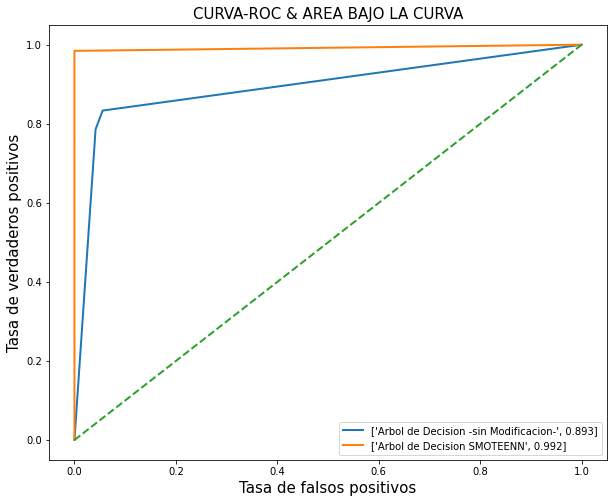

In [84]:
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
    
#ax.plot(fpr_1,tpr_1,label = [Estrategia[0], round(auc_score_1,3)],linewidth=2,linestyle="solid")
#ax.plot(fpr_11,tpr_11,label = [Estrategia[1], round(auc_score_11,3)],linewidth=2,linestyle="solid")
#ax.plot(fpr_3,tpr_3,label = [Estrategia[2], round(auc_score_3,3)],linewidth=2,linestyle="dotted")
#ax.plot(fpr_4,tpr_4,label = [Estrategia[3], round(auc_score_4,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_99,tpr_99,label = [Estrategia[2], round(auc_score_99,3)],linewidth=2,linestyle="solid")
ax.plot(fpr_44,tpr_44,label = [Estrategia[3], round(auc_score_44,3)],linewidth=2,linestyle="solid")
#ax.plot(fpr_8,tpr_8,label = [Estrategia[6], round(auc_score_8,3)],linewidth=2,linestyle="dotted")

ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
plt.legend(loc="Mejor",prop={'size':10})
plt.title("CURVA-ROC & AREA BAJO LA CURVA",fontsize=15)
plt.xlabel("Tasa de falsos positivos",fontsize=15)
plt.ylabel("Tasa de verdaderos positivos",fontsize=15)
#plt.savefig('roc_auc.eps',format='eps',dpi=1000,transparent=False)
plt.show()

